In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.metrics import mean_absolute_percentage_error as mape
%matplotlib inline

In [57]:
# read data
data = pd.read_csv('/Users/ndias/PycharmProjects/Salary Prediction/Salary Prediction/Data/data.csv')
data

,rating,salary,draft_round,age,experience,bmi
0,97,37436858.0,1,36,17,26.722594
1,97,32742000.0,1,29,9,25.271652
2,96,25842697.0,1,26,7,24.662519
3,96,37199000.0,1,32,13,24.107803
4,96,38199000.0,1,31,11,25.978759
...,...,...,...,...,...,...
434,95,40918900.0,1,33,14,24.107803
435,95,35361360.0,1,28,9,23.275703
436,94,10174391.0,1,22,3,25.494418
437,94,39344900.0,1,31,9,25.039611


In [3]:
corr = data.drop(columns='salary').corr(method='pearson')
corr

,rating,draft_round,age,experience,bmi
rating,1.000000,0.008064,0.292463,0.416545,0.077345
draft_round,0.008064,1.000000,-0.081857,-0.055498,0.047742
age,0.292463,-0.081857,1.000000,0.920067,0.086477
experience,0.416545,-0.055498,0.920067,1.000000,0.070941
bmi,0.077345,0.047742,0.086477,0.070941,1.000000


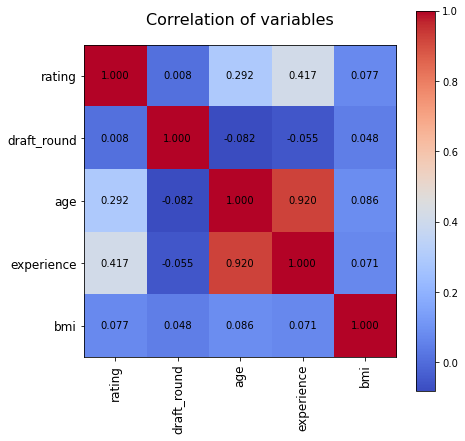

In [5]:
# create a heatmap and choose a colormap
plt.imshow(corr, cmap='coolwarm')

# add a colorbar
plt.colorbar()
# change the graph size
plt.gcf().set_size_inches(7, 7)

# add x-ticks, y-ticks and a label
ticks = ['rating', 'draft_round', 'age', 'experience', 'bmi']
plt.xticks(range(len(corr.columns)), ticks, fontsize=12, rotation=90)
plt.yticks(range(len(corr.columns)), ticks, fontsize=12)
plt.title('Correlation of variables', fontsize=16, pad=20)

# add labels to the cells
labels = corr.values
for a in range(labels.shape[0]):
    for b in range(labels.shape[1]):
        plt.text(a, b, '{:.3f}'.format(labels[b, a]), ha='center', va='center', color='black')

In [6]:
columns_to_drop = ['salary', 'experience', 'age']

In [7]:
y = data['salary']
X = data.drop(columns=columns_to_drop)

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)

In [9]:
model = LinearRegression()

In [10]:
model.fit(X_train, y_train)

LinearRegression()

In [11]:
y_pred = model.predict(X_test)

In [31]:
y_pred_df = pd.DataFrame(y_pred)

In [39]:
y_pred_df.head()

,0
0,9.452244e+06
1,4.293782e+06
2,1.526582e+06
3,4.245892e+06
4,6.628581e+06


In [41]:
y_pred_df['new_sal'] = 0

In [48]:
y_pred_df.columns = ['old_sal', "new_sal"]

In [49]:
y_pred_df.head()

,old_sal,new_sal
0,9.452244e+06,0
1,4.293782e+06,0
2,1.526582e+06,0
3,4.245892e+06,0
4,6.628581e+06,0


In [52]:
y_pred_df['new_salary'] = [0 if s < 0 else s for s in y_pred_df['old_sal']]

In [54]:
y_pred_df[y_pred_df.new_salary == 0]

,old_sal,new_sal,new_salary
28,-2.526169e+04,0,0.0
42,-1.140169e+05,0,0.0
49,-1.059489e+06,0,0.0
58,-1.202506e+06,0,0.0
67,-2.236889e+06,0,0.0
79,-1.123218e+06,0,0.0
102,-1.068199e+06,0,0.0
103,-1.209347e+06,0,0.0
117,-1.113410e+06,0,0.0
129,-1.186944e+06,0,0.0


In [63]:
def dealing_with_negative_salary(data_x):
    data_copy = data_x.copy()
    columns_to_drop = ['salary', 'experience', 'age']
    y = data_copy['salary']
    X = data_copy.drop(columns=columns_to_drop)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)
    model = LinearRegression()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_mean = y_train.mean()
    y_pred_df = pd.DataFrame(y_pred)
    y_pred_df.columns = ['old_sal']
    y_pred_df['new_salary'] = [0 if s < 0 else s for s in y_pred_df['old_sal']]
    y_drop_col = ['old_sal']
    y_pred_df.drop(columns=y_drop_col)
    mape_score = mape(y_test, y_pred_df['new_salary'])
    print(round(mape_score, 5))
    
    y_pred_df['mean'] = [y_mean if s < 0 else s for s in y_pred_df['old_sal']]
    mape_score = mape(y_test, y_pred_df['mean'])
    print(round(mape_score, 5))

In [64]:
dealing_with_negative_salary(data)

0.94701
3.03908
